pwd
#'/home/vincentwilde/Documents/thesis_1/Testymolo/testymolo/datamolo/scr'
source '../../../.venv/bin/activate'

### file path

In [46]:
INSERTS:str = "./../../testymolo/media/old_sql/VIRUS_1-2004-11-04_Inserts_2.sql"
TABLES: str = "./../../testymolo/media/old_sql/VIRUS_1-2004-11-04_Tables.sql"

tables_csv: str = "./../../testymolo/media/tables_csv/"


In [47]:
import re
import os


## cleanning outfiles
for each in os.listdir(tables_csv):
    if(each.endswith(".csv")):
        with open(os.path.join(tables_csv, each), 'w') as handle:
            handle.write("")


classes:dict = {}

with open(INSERTS) as handle:

    for line in handle.readlines():

        if(line.startswith("INSERT")):
            res = re.search("INSERT INTO ([^\s]+) ",line)
            tab_name = res.group(1)
            if(tab_name in classes):
                classes[tab_name] += 1
            else:
                classes[tab_name] = 1
            outfile = os.path.join(tables_csv,tab_name+".csv")
            res2 = re.search("VALUES \((.*)\);",line)
            values = r"{}".format(res2.group(1))
            with open(outfile,'a') as handle:
                handle.write(values +'\n')



# YATTA !

In [48]:
### caution when not all rows same nbr of col

def custom_csv_parser_to_list(infilepath:str):
    with open(infilepath ,'r') as handle:

        rows:list = []

        for line in handle.readlines():
            line = line.strip(';') # removing terminal ';' 
            values:list = [] # re-initialize value list
            val:str = "" # current parsing value
            inquote:bool = False # re-initialize in quote : False
            quote_char:str = '' # ' or "
            for c in line:
                if(c == ','): # encounter comma
                    if(not inquote): ## and not in quote
                        val = val.strip("'")
                        val = val.strip('"')
                        if(len(val) > 0):
                            values.append(val)
                        else:
                            values.append(None)
                        val = ""
                        continue
                elif(c == '"' or c == "'"): # encounter quote
                    if(inquote): # already in quote 
                        if(quote_char == c):  # encounter ending quote mark
                            inquote = False
                        else: # encounter the other quote mark 
                            pass
                    else: # encounter starting quote mark
                        inquote = True
                        quote_char = c
                elif((c == ' ' or c == '\n') and not inquote):  # get rid of whitespaces
                    continue
                val += c
            if(len(val)>0):
                val = val.strip("'")
                val = val.strip('"')
                values.append(val)

            if(len(values) > 0):
                rows.append(values)
                #print(values)  
        
        print("nbr of col", set([len(row) for row in rows]))
        print("nbr of rows", len(rows))
        return rows

In [49]:
### Biblio_Struct

import os

Biblio_Struct_h: list = ["Id_Biblio", "PubMed", "Title", "Auteur", "Journal", "Date"]
Biblio_Struct_p: str = os.path.join(tables_csv, 'Biblio_Struct.csv')

Biblio_Struct: list = custom_csv_parser_to_list(Biblio_Struct_p)
print(Biblio_Struct[0])

nbr of col {6}
nbr of rows 2
['1', '98062143', 'Isolation of an avirulent mutant of Sendai virus with two amino acid mutations from a highly virulent field strain through adaptation to LLC-MK2 cells', 'Itoh,M.', 'J. Gen. Virol. 78 (Pt 12), 3207-3215 (1997)', '13/01/03']


In [50]:
### CAZy_DB
CAZy_DB_h: list = ["DB_ac", "Protein", "DB_nom", "Organism", "abr", "Tax_id", "EC", "_3D_status",
                   "Length", "Sequence", "DB_note", "Created", "Modified", "PP_status", "Lib_sort"]  # 15
CAZy_DB_p: str = os.path.join(tables_csv, 'CAZy_DB.csv')

CAZy_DB: list = custom_csv_parser_to_list(CAZy_DB_p)
print(CAZy_DB[0])


nbr of col {15}
nbr of rows 647
['1', 'nucleocapsid protein', None, 'Nipah virus', 'NipahV', '121791', None, None, '532', 'MSDIFEEAASFRSYQSKLGRDGRASAATATLTTKIRIFVPATNSPELRWELTLFALDVIRSPSAAESMKVGAAFTLISMYSERPGALIRSLLNDPDIEAVIIDVGSMVNGIPVMERRGDKAQEEMEGLMRILKTARDSSKGKTPFVDSRAYGLRITDMSTLVSAVITIEAQIWILIAKAVTAPDTAEESETRRWAKYVQQKRVNPFFALTQQWLTEMRNLLSQSLSVRKFMVEILIEVKKGGSAKGRAVEIISDIGNYVEETGMAGFFATIRFGLETRYPALALNEFQSDLNTIKSLMLLYREIGPRAPYMVLLEESIQTKFAPGGYPLLWSFAMGVATTIDRSMGALNINRGYLEPMYFRLGQKSARHHAGGIDQNMANRLGLSSDQVAELAAAVQETSAGRQESNVQAREAKFAAGGVLIGGSDQDIDEGEEPIEQSGRQSVTFKREMSISSLANSVPSSSVSTSGGTRLTNSLLNLRSRLAAKAAKEAASSNATDDPAISNRTQGESEKKNNQDLKPAQNDLDFVRADV', None, '2002-05-13', '2004-09-16', 'no', 'N mononegavirales']


In [51]:
### CAZy_GB_GP
CAZy_GB_GP_h: list = ["DB_ac", "GP_ac", "GB_ac", "GP_gi", "GP_gene", "GP_genomic", "GP_begin", "GP_end",
                      "GP_note"]  # 9
CAZy_GB_GP_p: str = os.path.join(tables_csv, 'CAZy_GB_GP.csv')

CAZy_GB_GP: list = custom_csv_parser_to_list(CAZy_GB_GP_p)
print(CAZy_GB_GP[0])

nbr of col {9}
nbr of rows 644
['1', 'NP_112021.1', 'NC_002728', '13559809', 'N', None, '1', '532', 'Reference']


In [52]:
### CAZy_PDB
CAZy_PDB_h: list = ["DB_ac", "PDB_id", "PDB_chain", "PDB_begin", "PDB_end", "PDB_note", "PDB_bornModo"]  # 7
CAZy_PDB_p: str = os.path.join(tables_csv, 'CAZy_PDB.csv')

CAZy_PDB: list = custom_csv_parser_to_list(CAZy_PDB_p)
print(CAZy_PDB[0])


nbr of col {7}
nbr of rows 68
['99', '1EZJ', None, '320', '433', '95.6% identity', 'F35']


In [53]:
### CAZy_PP
CAZy_PP_h: list = ["DB_ac", "PP_ac", "PP_gi",
                   "PP_gene", "PP_begin", "PP_end", "PP_note", "PP_diff"]  # 8
CAZy_PP_p: str = os.path.join(tables_csv, 'CAZy_PP.csv')

CAZy_PP: list = custom_csv_parser_to_list(CAZy_PP_p)
print(CAZy_PP[0])


nbr of col {8}
nbr of rows 773
['269', '7', None, 'NS4A protein', '1658', '1711', 'EX-HD-F226 ', 'no']


In [54]:
### CAZy_SP
CAZy_SP_h: list = ["DB_ac", "SP_ac", "SP_id",
                   "SP_gene", "SP_begin", "SP_end", "SP_note"]  # 7
CAZy_SP_p: str = os.path.join(tables_csv, 'CAZy_SP.csv')

CAZy_SP: list = custom_csv_parser_to_list(CAZy_SP_p)
print(CAZy_SP[0])


nbr of col {7}
nbr of rows 4
['68', 'P35944', 'NCAP_PHODV', 'N', '1', '523', 'Reference']


In [55]:
## CAZyModO
CAZyModO_h: list=["URL_family", "URL_title",
                 "URL_body", "URL_relative", "URL_note", "Modified"] # 6
CAZyModO_p: str = os.path.join(tables_csv, 'CAZyModO.csv')
CAZyModO: list = custom_csv_parser_to_list(CAZyModO_p)
print(CAZyModO[0])

nbr of col {6}
nbr of rows 2
['UNK2B', None, None, None, None, '2002-06-07']


In [56]:
## Cz_EC
Cz_EC_h: list=["DB_ac", "EC"]  # 2
Cz_EC_p: str = os.path.join(tables_csv, 'Cz_EC.csv')
Cz_EC: list = custom_csv_parser_to_list(Cz_EC_p)
print(Cz_EC[0])


nbr of col {2}
nbr of rows 2
['269', '2.7.7.48']


In [57]:
## EC_num
EC_num_h: list=["EC", "EC_name", "EC_othername", "EC_reaction", "EC_comment"]  # 5
EC_num_p: str = os.path.join(tables_csv, 'EC_num.csv')
EC_num: list = custom_csv_parser_to_list(EC_num_p)
print(EC_num[0])


nbr of col {5}
nbr of rows 1
['2.7.7.48', 'RNA-directed RNA polymerase.', 'RNA nucleotidyltransferase (RNA-directed).', 'N nucleoside triphosphate = N diphosphate + {RNA}(N).', '-!- Catalyzes RNA-template-directed extension of the 3prim-end of an RNAstrand by one nucleotide at a time.-!- Can initiate a chain de novo.-!- See also EC 2.7.7.6.']


In [58]:
## Fam_biblio
Fam_biblio_h: list=["Family", "Id_Biblio"]  # 2
Fam_biblio_p: str = os.path.join(tables_csv, 'Fam_biblio.csv')
Fam_biblio: list = custom_csv_parser_to_list(Fam_biblio_p)
print(Fam_biblio[0])


nbr of col {2}
nbr of rows 1
['F35', '1']


In [59]:
## ModO_Composition
ModO_Composition_h: list=["DB_ac", "Mod_num", "Family",
                         "Subf"]  # 4
ModO_Composition_p: str = os.path.join(tables_csv, 'ModO_Composition.csv')
ModO_Composition: list = custom_csv_parser_to_list(ModO_Composition_p)
print(ModO_Composition[0])

nbr of col {4}
nbr of rows 2797
['191', '1', 'F55', '']


In [60]:
## ModO_CrossRefs
ModO_CrossRefs_h: list=["Family", "Link", "URL_base", "URL_string", 
                       "Ref_note"]  # 5
ModO_CrossRefs_p: str = os.path.join(tables_csv, 'ModO_CrossRefs.csv')
ModO_CrossRefs: list = custom_csv_parser_to_list(ModO_CrossRefs_p)
print(ModO_CrossRefs[0])


nbr of col {5}
nbr of rows 77
['F116', 'Interferon AntaGonist', 'http://139.124.42.180/VIZIR/phpVIZIR/BILANS/functional_characterization.htm', None, '']


In [61]:
## ModO_Families
ModO_Families_h: list=["Family", "Family_Name", "Family_Activity", "Family_Taxo",
                      "Clan", "Family_note", "Family_Private_note", "Fold",
                      "ModoS_uniqfct", "ModoS_Activity", "ModoS_Description", "ModoS_Fold", "ModoS_note", "ModoS_Private_note",
                      "web_descript", "web_status"]  # 16
ModO_Families_p: str = os.path.join(tables_csv, 'ModO_Families.csv')
ModO_Families: list = custom_csv_parser_to_list(ModO_Families_p)
print(ModO_Families[0])


nbr of col {16}
nbr of rows 514
['UNK', 'unknown', None, 'NULL', None, None, None, None, 'no', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL']


In [62]:
## ModO_Limits
ModO_Limits_h: list = ["DB_ac", "Mod_num", "Mod_begin", "Mod_end"]  # 4
ModO_Limits_p: str = os.path.join(tables_csv, 'ModO_Limits.csv')
ModO_Limits: list = custom_csv_parser_to_list(ModO_Limits_p)
print(ModO_Limits[0])


nbr of col {4}
nbr of rows 2829
['191', '1', '1', '188']


In [63]:
## Motifs
Motifs_h: list = ["motifs_ac", "motifs_name", "motifs_activity", "motifs_classification", "motifs_form", "motifs_note"]
Motifs_p: str = os.path.join(tables_csv, 'Motifs.csv')
Motifs: list = custom_csv_parser_to_list(Motifs_p)
print(Motifs[0])

nbr of col {6}
nbr of rows 58
['1', 'motif I', 'helicase', 'super family 1', '[FHILVWY]-x-G-x-P-G-x-G-K-[ST]-x(0,2)-[FHILVWY]', 'NULL']


In [64]:
## Organism
Organism_h: list = ["Tax_id", "Name", "Categorie",
                    "Classe", "Ordre", "Fam", "SsFam", "Genre", "Note_org"]
Organism_p: str = os.path.join(tables_csv, 'Organism.csv')
Organism: list = custom_csv_parser_to_list(Organism_p)
print(Organism[0])


nbr of col {9}
nbr of rows 166
['11207', 'Simian parainfluenza virus 5', 'Viruses', 'ssRNA negative-strand viruses', 'Mononegavirales', 'Paramyxoviridae', 'Paramyxovirinae', 'Rubulavirus', '']


In [65]:
## Prot_biblio

Prot_biblio_h: list = ["DB_ac", "Id_Biblio"]
Prot_biblio_p: str = os.path.join(tables_csv, 'Prot_biblio.csv')
Prot_biblio: list = custom_csv_parser_to_list(Prot_biblio_p)
print(Prot_biblio[0])


nbr of col {2}
nbr of rows 1
['99', '1']


In [66]:
## Prot_Infos

Prot_Infos_h: list = ["DB_ac", "INFO_indice", "INFO_ac", "INFO_Nature", "INFO", "INFO_pmid"]
Prot_Infos_p: str = os.path.join(tables_csv, 'Prot_Infos.csv')
Prot_Infos: list = custom_csv_parser_to_list(Prot_Infos_p)
print(Prot_Infos[0])


nbr of col {6}
nbr of rows 159
['90', '0', '1', 'Biochemical', 'N-Tail desordonnee', 'NULL']


In [67]:
## Prot_MOTIF

Prot_MOTIF_h: list = ["DB_ac", "MOTIF_indice", "MOTIF_ac", "MOTIF_name", "MOTIF_begin", "MOTIF_end",
                      "MOTIF", "MOTIF_activity", "MOTIF_class", "MOTIF_note", "MOTIF_ref", "MOTIF_pmid"] # 12
Prot_MOTIF_p: str = os.path.join(tables_csv, 'Prot_MOTIF.csv')
Prot_MOTIF: list = custom_csv_parser_to_list(Prot_MOTIF_p)
print(Prot_MOTIF[0])


nbr of col {12}
nbr of rows 809
['96', '0', '1', 'Hinge', '1695', '1712', 'NULL', 'Hinge', None, 'prouve biochimiquement', 'NULL', '12072530']


In [68]:
## Prot_MUT

Prot_MUT_h: list = ["DB_ac", "MUT_indice", "MUT_ac", "MUT",
                      "MUT_note", "MUT_ref", "MUT_pmid"]  # 7
Prot_MUT_p: str = os.path.join(tables_csv, 'Prot_MUT.csv')
Prot_MUT: list = custom_csv_parser_to_list(Prot_MUT_p)
print(Prot_MUT[0])


nbr of col {7}
nbr of rows 9
['90', '0', '1', 'S228Q; L229D', "action sur l\\'interaction N=N, Supression de la formation de la nucleocapside (aggregats aleatoires) et de la liaison a l\\'ARN.", 'Virology 2002 Oct 25;302(2):420-32', '12441086']


In [69]:
## Prot_REG

Prot_REG_h: list = ["DB_ac", "REG_indice", "REG_ac", "REG_name", "REG_begin", "REG_end",
                    "REG_note", "REG_ref", "REG_pmid"]  # 9
Prot_REG_p: str = os.path.join(tables_csv, 'Prot_REG.csv')
Prot_REG: list = custom_csv_parser_to_list(Prot_REG_p)
print(Prot_REG[0])


nbr of col {9}
nbr of rows 42
['494', '4', '1', 'HD', '3026', '3137', 'module F196', None, 'NULL']


In [70]:
## Prot_RI

Prot_RI_h: list = ["DB_ac", "RI_indice", "RI_ac", "RI_name", "RI_begin", "RI_end",
                   "RI_no_limit", "RI_note", "RI_ref", "RI_pmid"]  # 10
Prot_RI_p: str = os.path.join(tables_csv, 'Prot_RI.csv')
Prot_RI: list = custom_csv_parser_to_list(Prot_RI_p)
print(Prot_RI[0])


nbr of col {10}
nbr of rows 112
['90', '0', '2', 'antigenic region', '457', '476', 'NULL', 'N-TAIL; epitope recognized by monoclonal antibody Cl25', 'NULL', 'NULL']


M11  6
M12  3
M13  3
1 329
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [27, 29, 35, 44, 56, 71, 92, 103, 113, 329]


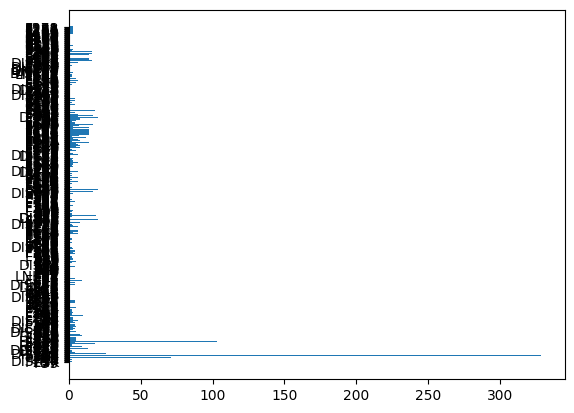

In [159]:
import matplotlib.pyplot as plt
import numpy as np

Items:dict = {}
for item in ModO_Composition:
    fam_id = item[2]
    if fam_id in Items:
        Items[fam_id] += 1
    else :
        Items[fam_id] = 1
# dict[fam.id] = nbr_sequence

Counts: dict = {}
for k, v in Items.items():
    if v in Counts:
        Counts[str(v)] += 1
    else :
        Counts[str(v)] = 1

X: list = [int(val) for val in Counts.keys()]
Y: list = Counts.values()
count: list = list(Items.values())
count.sort()

print("M11 ", Items["M11"])
print("M12 ", Items["M12"])
print("M13 ", Items["M13"])

#print(X)
#print(Y)
#plt.scatter(X,Y)

print(min(Items.values()),max(Items.values()))
print(count[:10], count[-10:])

y_pos = np.arange(len(Items.keys()))
plt.barh(y_pos, Items.values())
plt.yticks(y_pos, Items.keys())
plt.show()


#ones:int = 0
#for c in count:
#    if c == 1:
#        ones += 1
#print("ones : ", ones)

In [128]:
def get_family(ac:str, _print=True):
    result:list = []
    for item in ModO_Composition:
        if(item[0] == ac):
            result.append(item[1:])
    if(_print):
        print(f"ac {ac} : {len(result)}")
    return(result)

print(get_family("191"))

print(get_family("3"))

ac 191 : 2
[['1', 'F55', ''], ['2', 'F16', '']]
ac 3 : 3
[['2', 'DISF14', ''], ['1', 'F26', ''], ['3', 'F22', '']]


In [129]:
def get_nbr_annotations(ac:str, _print=True):
    Annotations:list = [Prot_Infos, Prot_MOTIF, Prot_MUT, Prot_REG, Prot_RI]
    result:list = []
    for a, tab in enumerate(Annotations):
        for item in tab:
            if(item[0] == ac ):
                result.append((a,item[1:]))
    if(_print) :
        print(f"ac {ac}: {len(result)}")
    return result


print(get_nbr_annotations("191"))

print(get_nbr_annotations("3"))


ac 191: 1
[(0, ['0', '1', 'prot infos NCBI', 'NCBI name : NS protein', 'NULL'])]
ac 3: 2
[(1, ['0', '1', 'motif I', '14', '19', 'I-D-x-I-x-K', 'trigger sequences motifs retrivied in coiled coil', None, 'in F26', None, 'NULL']), (1, ['0', '2', 'motif zinc binding', '408', '455', 'H-R-R-E-x(11)-V-x(2)-W-C-N-P-x-C-x(2)-I-x(8)-C-x-C-x(2)-C-P-x(2)-C-x(2)-C', 'zinc binding', 'paramyxoviridae', 'in F22', None, 'NULL'])]


In [130]:
def get_limits(ac:str, _print=True):
    result:list=[]
    for item in ModO_Limits:
        if(ac == item[0]):
            result.append(item[1:])
    if(_print) :
        print(f"ac {ac}: {len(result)}")
    return [(int(r[0]), int(r[1]), int(r[2])) for r in result]

print(get_limits("191"))

ac 191: 2
[(1, 1, 188), (2, 189, 265)]


0 27


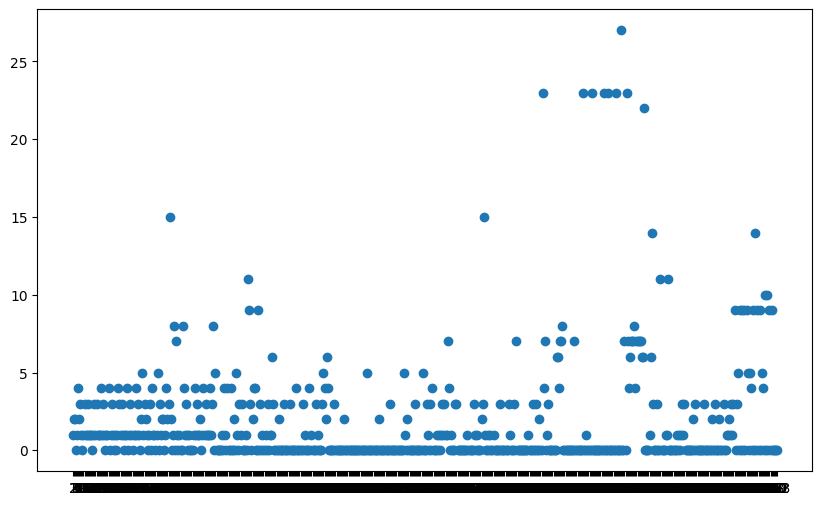

In [131]:
# nbr of annotations per accession
X:list = [item[0] for item in CAZy_DB]
Y:list = [len(get_nbr_annotations(x, False)) for x in X]

print(min(Y),max(Y))

plt.figure(figsize=(10,6))
plt.scatter(X,Y)

In [132]:
# nbr of annotation without any annotation

voids:list = []
for i in range(len(X)):
    if(Y[i] == 0):
        voids.append(X[i])
print(len(voids),'/' , len(X))


366 / 647


In [140]:
def question_1_b():
    k = 0
    j = 0
    for ac in X:
        j += 1
        Fams = get_family(ac, False)
        Lims = get_limits(ac, False)
        if(len(Fams) != len(Lims)):
            #print("ac:", ac, " fam:", len(Fams), " lim:", len(Lims))
            #print("fam:", [(item[0],item[1]) for item in Fams])
            #print("lim:", [(item[0],f"{item[-2]}:{item[-1]}") for item in Lims])
            k += 1
    print(k,"/",j)
    
question_1_b()

31 / 647


In [154]:
# families web status ?

# tab: Fam_biblio -> 1 -> ['F35', 1]


Fam_web_no_null:list = []
for item in ModO_Families:
    fam_id:str = item[0]
    if(item[-1] not in ['NULL', "NULL", '0'] or item[-2] not in ['NULL', "NULL", "nd", None]):
        Fam_web_no_null.append(item)
print(len(Fam_web_no_null), len(ModO_Families))

print("web_descript",  set([it[-2] for it in Fam_web_no_null]))
print("web_status",  set([it[-1] for it in Fam_web_no_null]))


169 514
web_descript {'multimerization domain', 'helicase/RNATriPhosphatase', 'protease', 'nd', 'glycoprotein', 'encapsidation RNA protein', 'spike', 'methyltransferase', 'methytransferase', 'hydrophobic', 'probable multimerization domain', 'zinc binding domain', 'membrane protein', 'minor RNA encapsidation protein', 'posttranscriptional regulator', 'cofactor polymerase', 'neuraminidase', 'helicase', 'Polymerase', 'regulatory factor of RNA synthesis', 'cofactor in polymerase complex', 'hemagglutinin', 'minor matrix protein', 'ionic channel (mb protein)', 'disorder', 'RNA encapsidation protein', 'neuraminidase or sialidase', 'disorder (membrane protein)', 'polymerase', 'X domain', 'transcription antitermination factor'}
web_status {'NULL', '0', '1'}


In [156]:
# families fold ?


Fam_fold: list = []
i = ModO_Families_h.index('Fold')
print(i)

for item in ModO_Families:
    #fam_id: str = item[0]
    fold_val:str = item[i]
    if(fold_val not in ['NULL', "NULL", "0", None, 'no']):
        Fam_fold.append(fold_val)
print(len(Fam_fold), len(ModO_Families))

print("fold",  set(Fam_fold))


7
15 514
fold {'beta barrel', 'rossmann', 'OB-fold', 'Trypsin-like serine', 'coiled-coil', 'b-propeller', 'a/b', '6-fold b-propeller'}
